<a href="https://colab.research.google.com/github/robswyn/Machine-Learning/blob/master/StockPrediction1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
Extract AAPL Stock Price 

In [0]:
import pandas as pd
import datetime
import numpy as np #CORRECTION: was missing, later np. call not working
import pandas_datareader.data as web
from pandas import Series, DataFrame
from pandas.plotting import scatter_matrix ##CORRECTION: was not imported and called incorrectly later
from math import ceil ##CORRECTION: was not imported and call was not working later
from sklearn import preprocessing ##CORRECTION: was not imported and preprocessing couldn't be called by itself
from sklearn.model_selection import train_test_split ##CORRECTION: was missing and messing up our X_train data later
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline




In [0]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2019, 9, 11)

df = web.DataReader("AAPL", 'yahoo', start, end)
df.tail(10)

High         Low  ...      Volume   Adj Close
Date                                ...                        
2019-08-28  205.720001  203.320007  ...  15938800.0  205.529999
2019-08-29  209.320007  206.660004  ...  20990500.0  209.009995
2019-08-30  210.449997  207.199997  ...  21143400.0  208.740005
2019-09-03  206.979996  204.220001  ...  20023000.0  205.699997
2019-09-04  209.479996  207.320007  ...  19188100.0  209.190002
2019-09-05  213.970001  211.509995  ...  23913700.0  213.279999
2019-09-06  214.419998  212.509995  ...  19362300.0  213.259995
2019-09-09  216.440002  211.070007  ...  27309400.0  214.169998
2019-09-10  216.779999  211.710007  ...  31777900.0  216.699997
2019-09-11  223.710007  217.729996  ...  43590900.0  223.589996

[10 rows x 6 columns]

Code for rolling means

In [0]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()
mavg.tail (10)

Date
2019-08-28    198.286788
2019-08-29    198.391109
2019-08-30    198.498685
2019-09-03    198.564745
2019-09-04    198.682279
2019-09-05    198.841507
2019-09-06    198.996962
2019-09-09    199.161318
2019-09-10    199.312470
2019-09-11    199.525277
Name: Adj Close, dtype: float64

Overlay the Moving Average with our Stock Price Chart


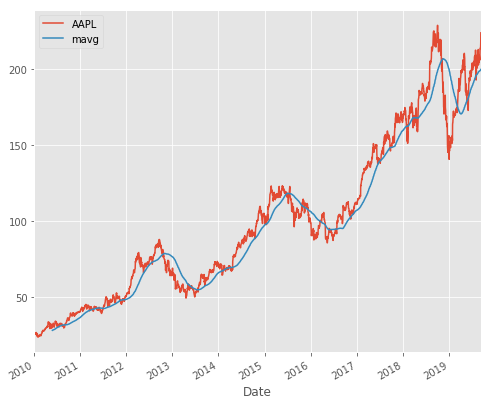

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

Pot Returns

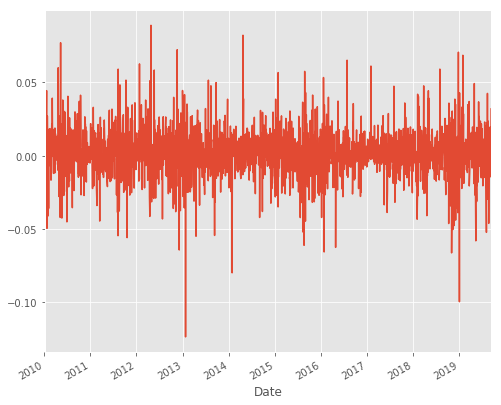

In [0]:
rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')

Analyse Competitors

In [0]:
dfcomp = web.DataReader(["AAPL", "GE", "GOOG", "IBM", "MSFT"],'yahoo',start=start,end=end)['Adj Close']
dfcomp.tail (10)


Symbols           AAPL    GE         GOOG         IBM        MSFT
Date                                                             
2019-08-28  205.529999  7.94  1171.020020  132.759995  135.559998
2019-08-29  209.009995  8.11  1192.849976  134.880005  138.119995
2019-08-30  208.740005  8.25  1188.099976  135.529999  137.860001
2019-09-03  205.699997  8.33  1168.390015  134.100006  136.039993
2019-09-04  209.190002  8.80  1181.410034  136.320007  137.630005
2019-09-05  213.279999  8.81  1211.380005  140.970001  140.050003
2019-09-06  213.259995  8.71  1204.930054  140.570007  139.100006
2019-09-09  214.169998  8.96  1204.410034  142.600006  137.520004
2019-09-10  216.699997  9.14  1206.000000  145.050003  136.080002
2019-09-11  223.589996  9.36  1220.170044  143.600006  136.119995

Correction Analysis

In [0]:
retscomp = dfcomp.pct_change()
corr = retscomp.corr()
corr.tail ()

Symbols      AAPL        GE      GOOG       IBM      MSFT
Symbols                                                  
AAPL     1.000000  0.322177  0.463748  0.386122  0.457479
GE       0.322177  1.000000  0.331997  0.437692  0.360163
GOOG     0.463748  0.331997  1.000000  0.407093  0.539064
IBM      0.386122  0.437692  0.407093  1.000000  0.491359
MSFT     0.457479  0.360163  0.539064  0.491359  1.000000

Plot Apple and GE with ScatterPlot

Text(0, 0.5, 'Returns GE')

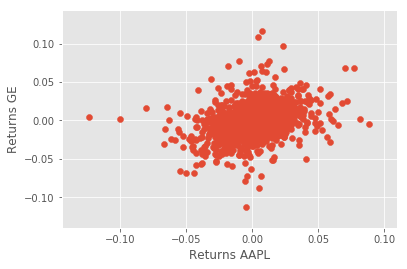

In [0]:
plt.scatter(retscomp.AAPL, retscomp.GE)
plt.xlabel('Returns AAPL')
plt.ylabel('Returns GE')

Kernel Density Estimate (KDE). KDE is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample. It helps generate estimations of the overall distributions.

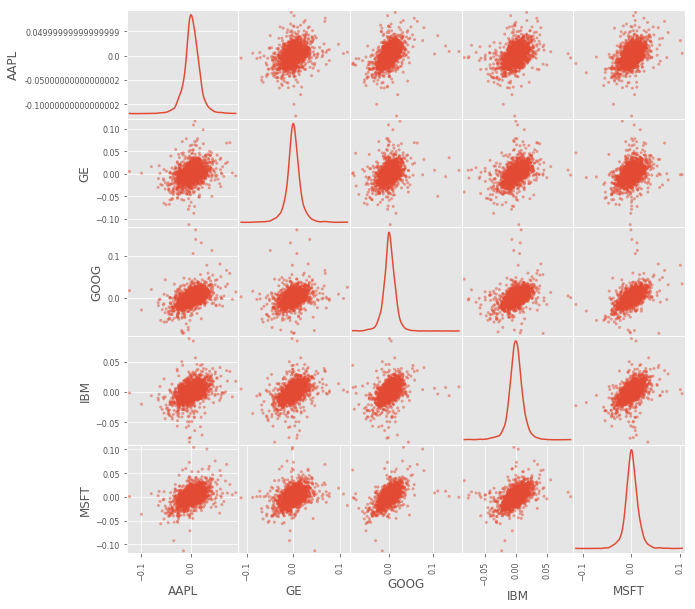

In [0]:
scatter_matrix(retscomp, diagonal='kde', figsize=(10, 10));


HeatMap to show correlation ranges- the lighter the colour the more correlation 

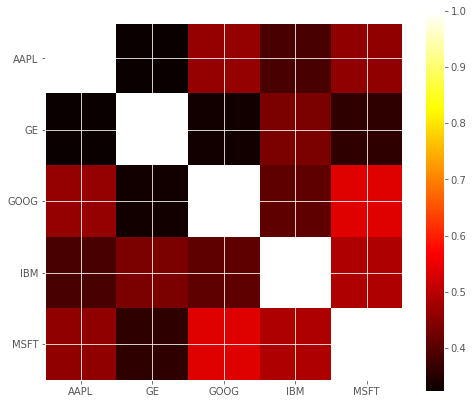

In [0]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

Stock Return and Risk 

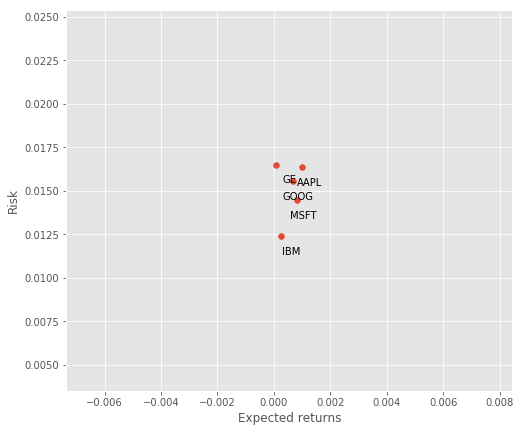

In [0]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y, in zip(retscomp.columns, retscomp.mean(),
retscomp.std()): #CORRECTION: separated onto different lines for easier readability, moved xytext after textcoords definition
    plt.annotate(
        label, #this is the text
        xy = (x, y), #this is the point to label
        textcoords='offset points',#how to position the text. 
        xytext = (20, -20), #used to say test, changed to text. distance from text to points x,y
        ha='right', #horizontal alignment can be left right or center
        va='bottom') #vertical alignment can be top middle or bottom
        #bbox = dict(boxstyle = 'round4,pad=0.5', fc = 'yellow', alpha = 0.5),
        #arrowprops = dict(arrowstyle = '->',, connectionstyle = 'arc3, rad=0')

In [0]:
#Engineering some features for the algorithms: High Low Percentage and Percentage Change
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0

##PREPROCESSING AND DATA VALIDATION
#Drop missing value
dfreg.fillna(value=-99999, inplace = True)
dfreg.dropna(inplace=True) #CORRECTION: ADDED NEW SO X AND y ARE EQUAL

#we want to separate 1% of the data to forecast
forecast_out = int(ceil(.01 * len(dfreg))) #CORRECTION: was called incorrectly in former code below
#FORMERCODE forecast_out = int(math.ceil(0.01 * len(dfreg)))

#separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))

#Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)

#Finally we want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

#Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]

##TIME TO START THE CLASSIFIERS!

#CORRECTION: DEFINING X_train before we use it
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



In [0]:
#Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)

#Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

#Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)

#KNN regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

#let's evaluate all of the models against eachother
confidencereg = clfreg.score(X_test,y_test)
confidencepoly2 = clfpoly2.score(X_test, y_test)
confidencepoly3 = clfpoly3.score(X_test,y_test)
confidenceknn = clfknn.score(X_test, y_test)

# results
('The linear regression confidence is', confidencereg)
('The quadratic regression 2 confidence is ', confidencepoly2)
('The quadratic regression 3 confidence is ', confidencepoly3)
('The knn regression confidence is ', confidenceknn)

#printing some of the stocks forecasts
forecast_set_reg = clfreg.predict(X_lately) #CORRECTION: NEWLY CHANGED NAMES
forecast_set_poly2 = clfpoly2.predict(X_lately) #CORRECTION: NEWLY CHANGED NAMES
forecast_set_poly3 = clfpoly3.predict(X_lately) #CORRECTION: NEWLY CHANGED NAMES
forecast_set_knn = clfknn.predict(X_lately) #CORRECTION: NEWLY CHANGED NAMES
dfreg['Forecast'] = np.nan


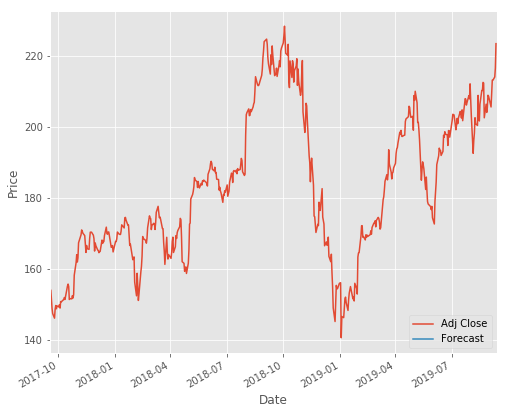

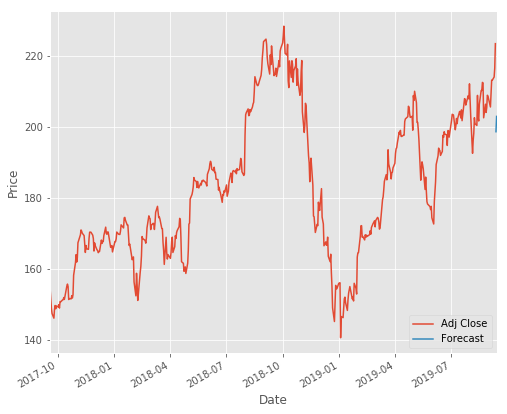

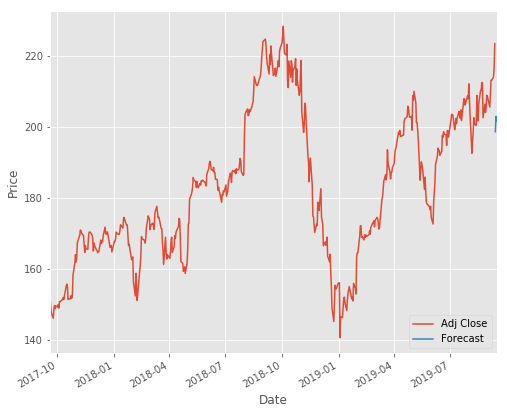

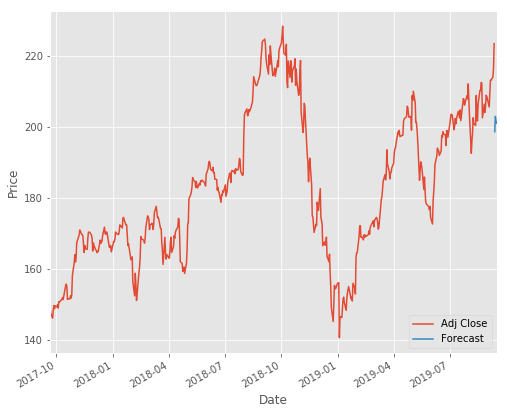

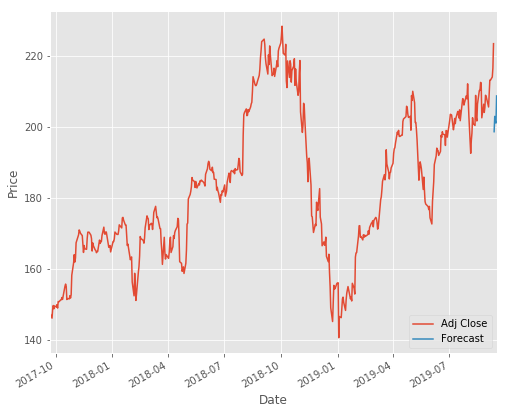

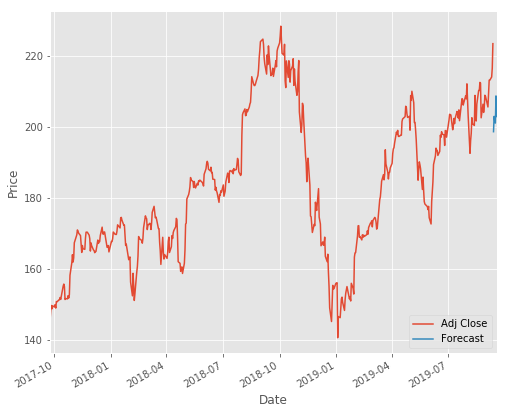

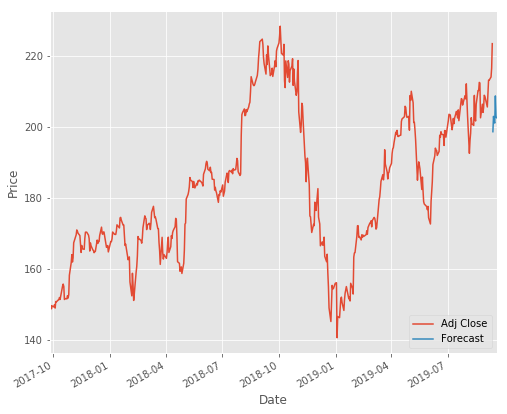

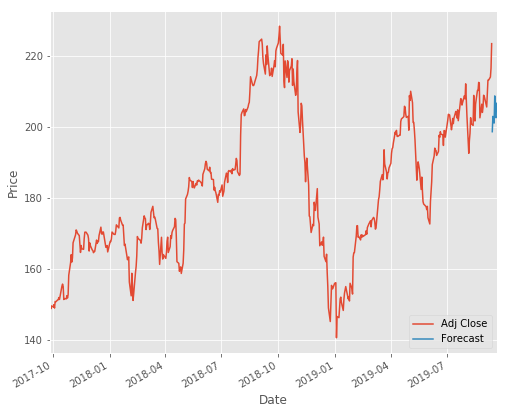

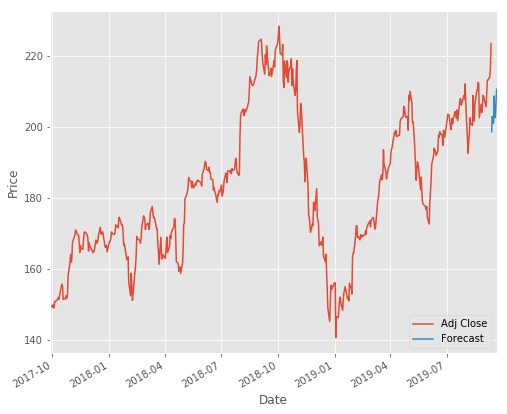

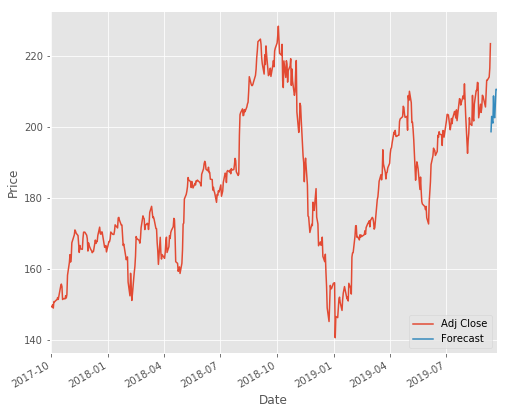

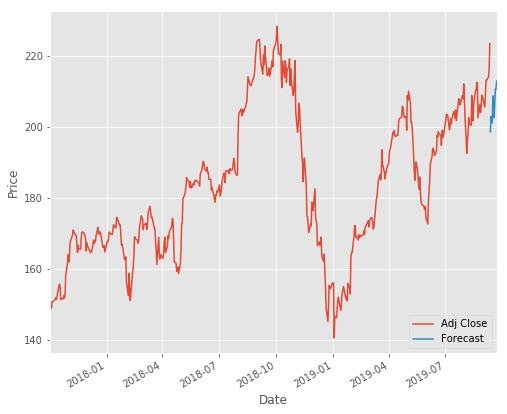

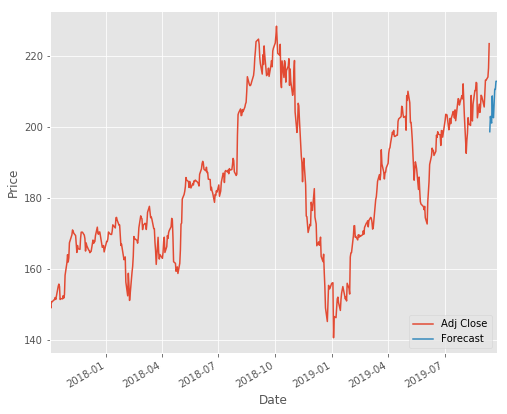

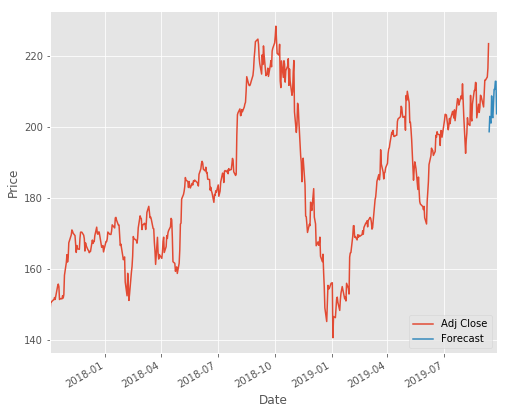

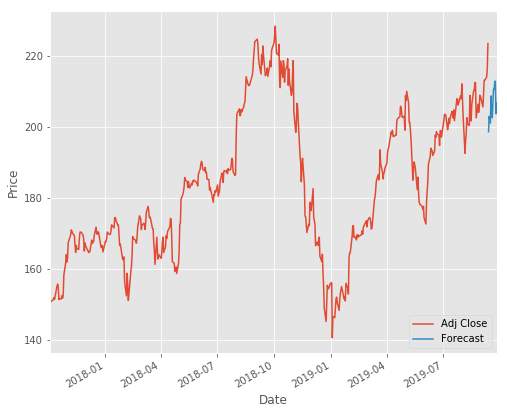

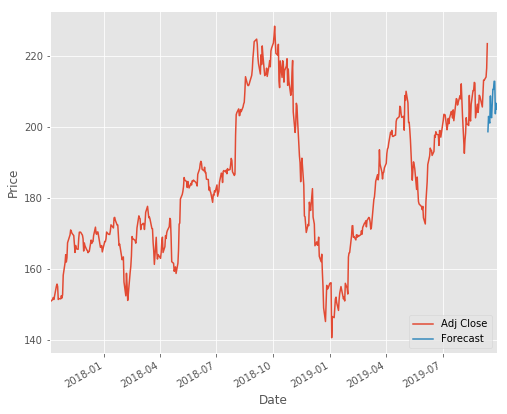

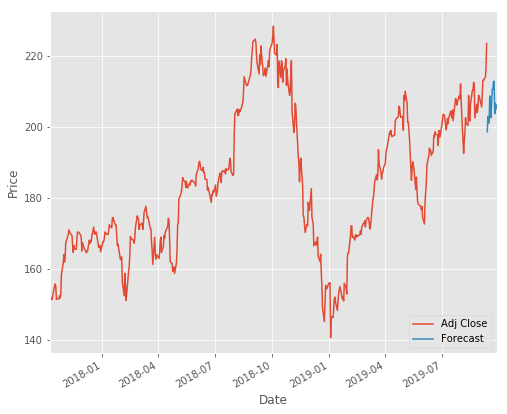

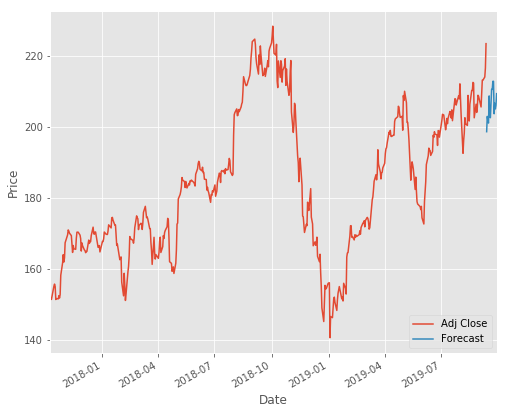

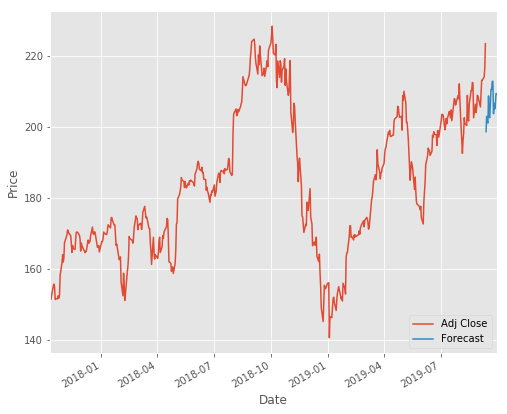

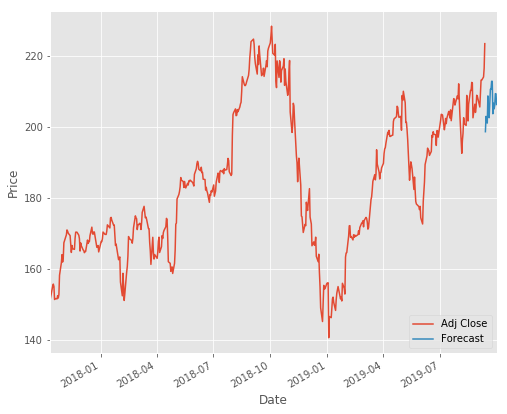

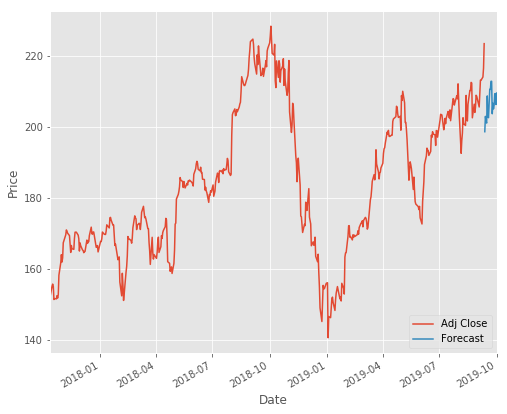

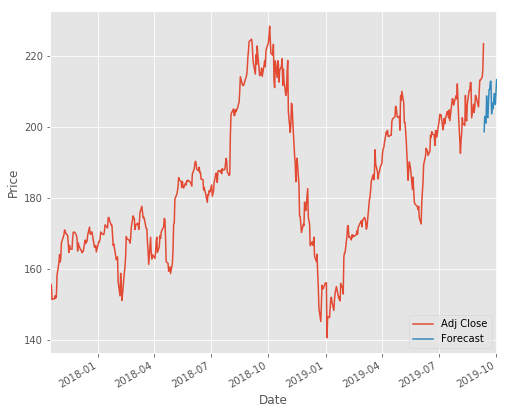

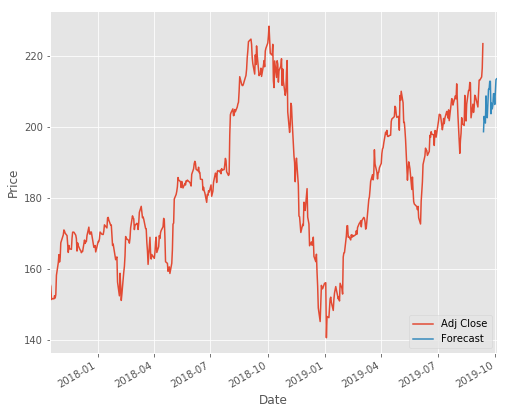

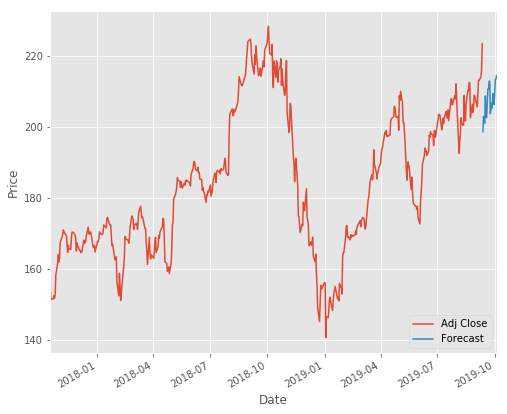

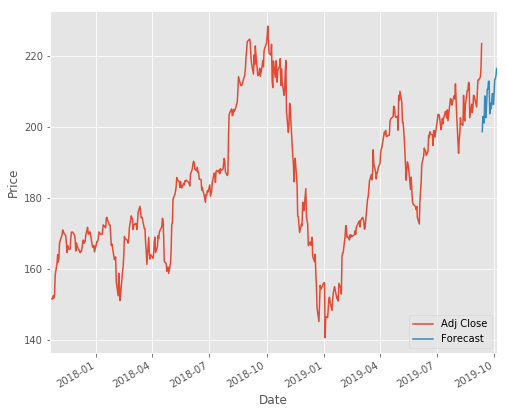

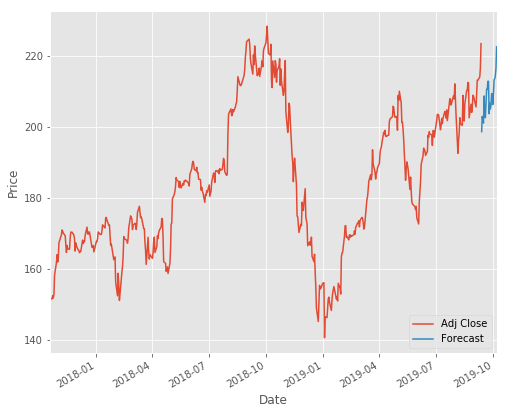

In [0]:
#Plotting the forecast with existing historical data so we can compare it to future price movements
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set_reg: #CORRECTION: NAME UPDATED AND CODE DUPLICATED FOR NEW ALGORITHM
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]

    dfreg['Adj Close'].tail(500).plot()
    dfreg['Forecast'].tail(500).plot()
    plt.legend(loc=4)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()

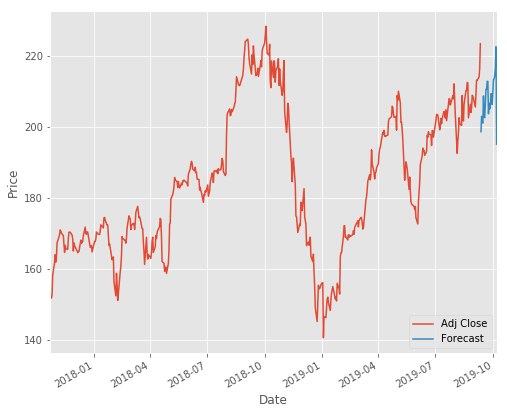

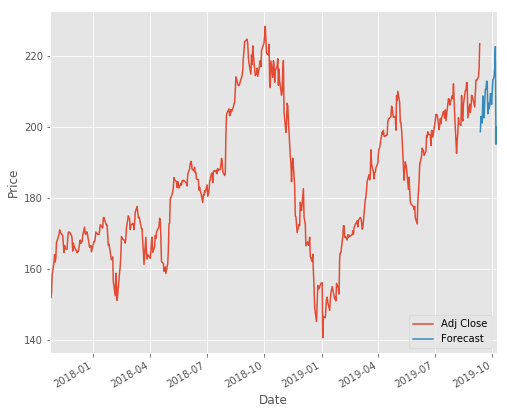

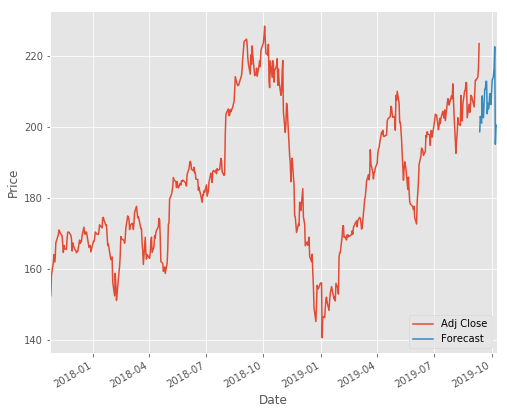

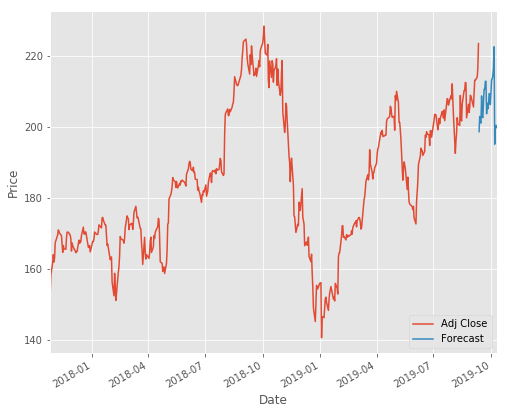

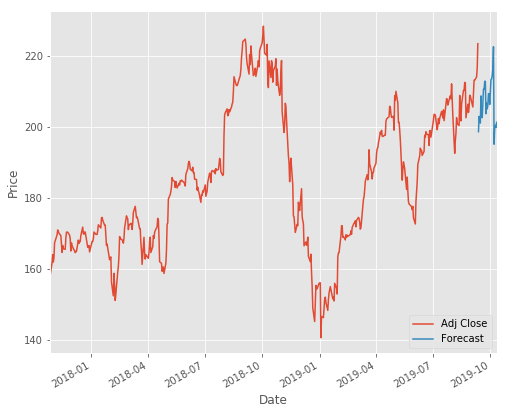

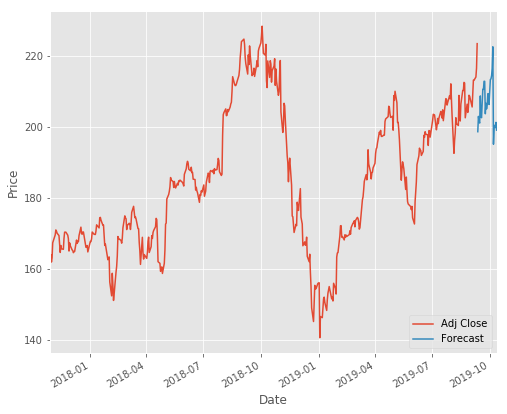

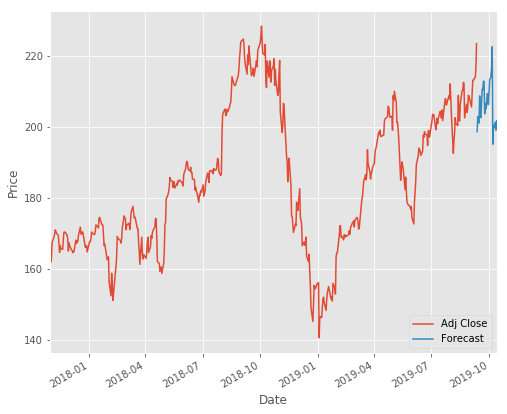

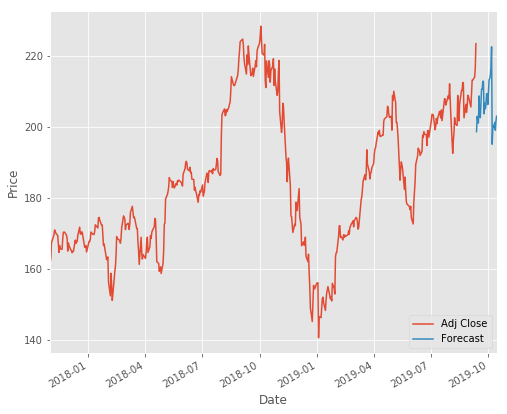

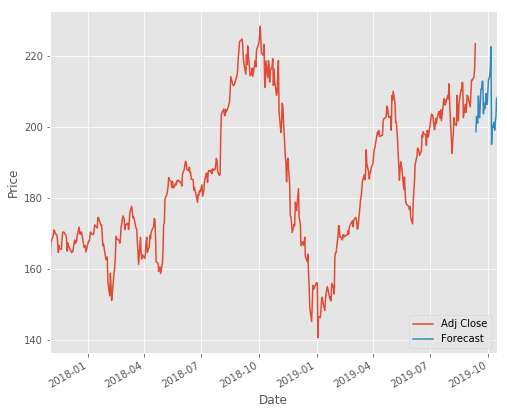

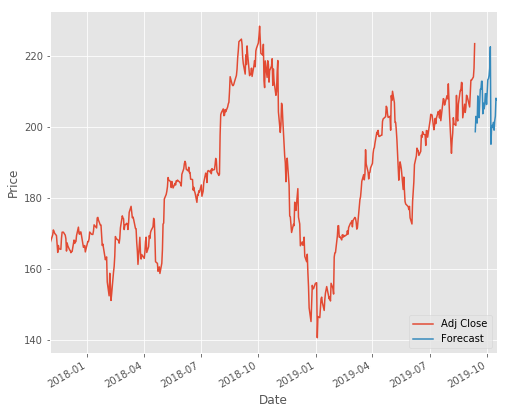

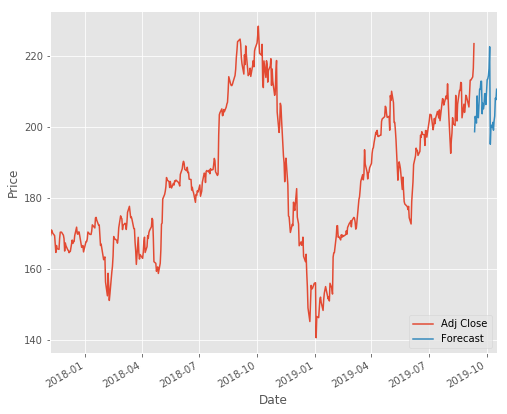

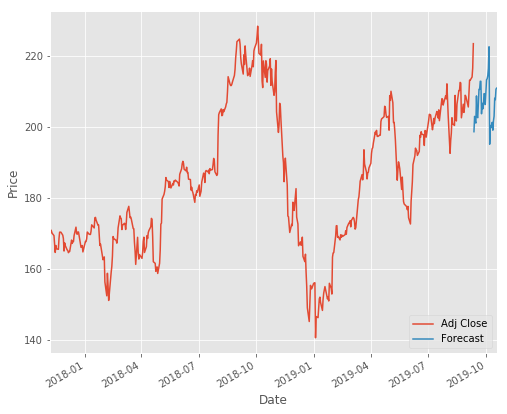

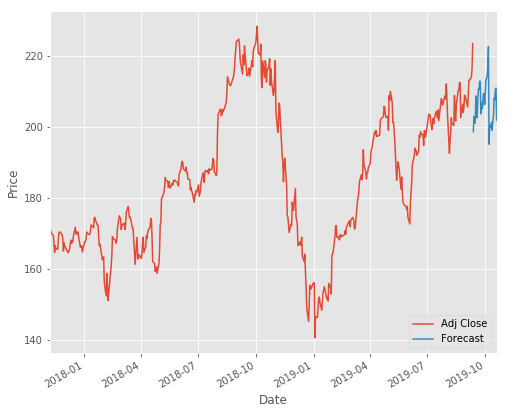

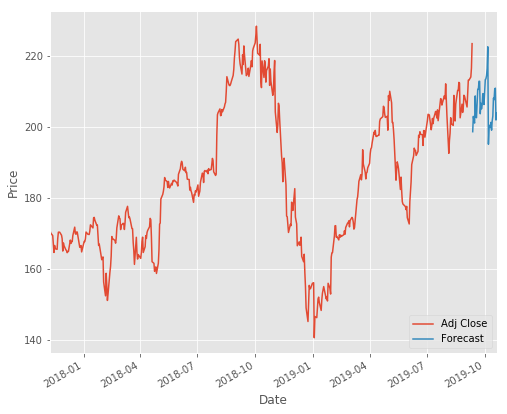

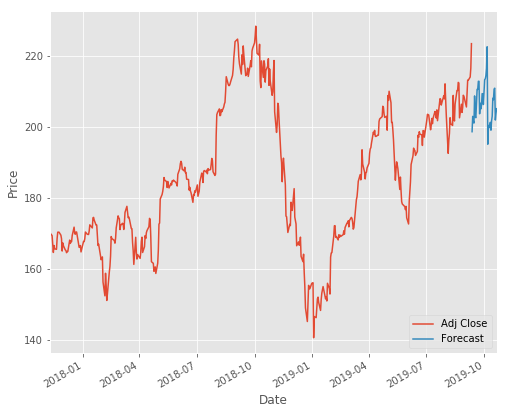

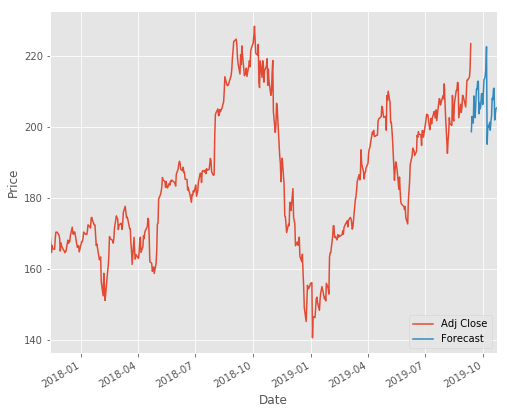

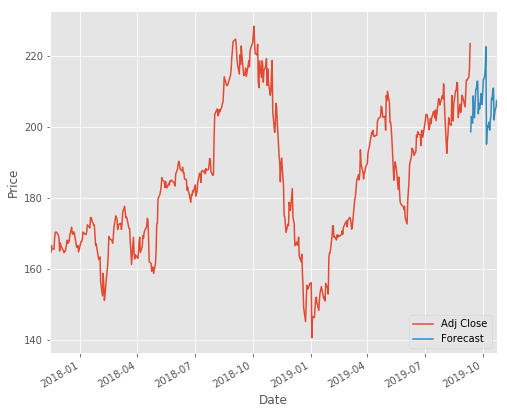

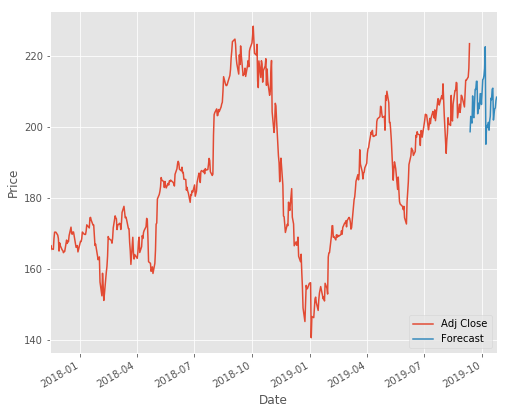

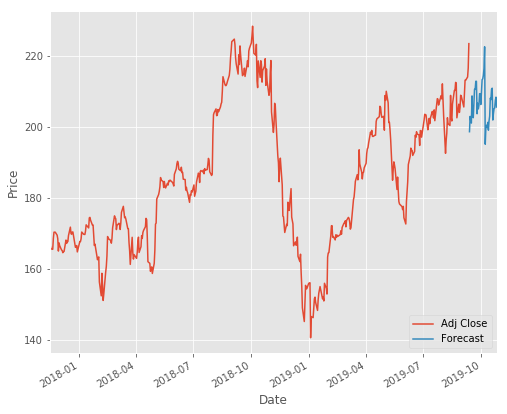

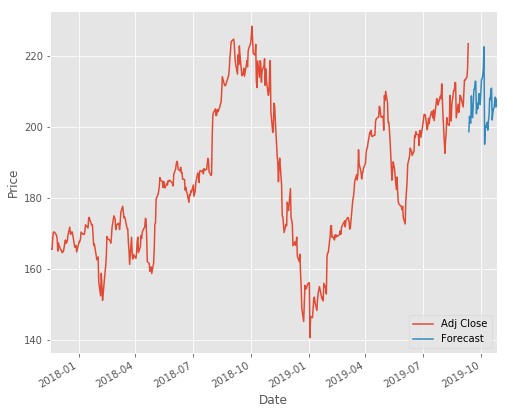

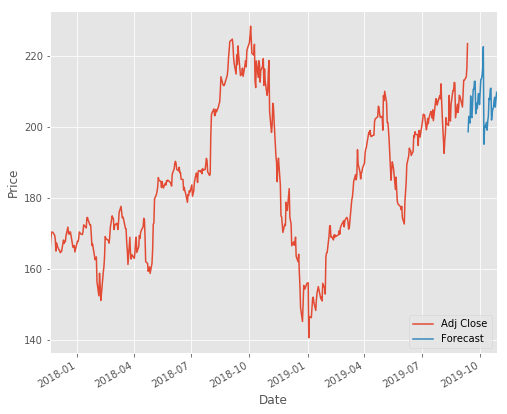

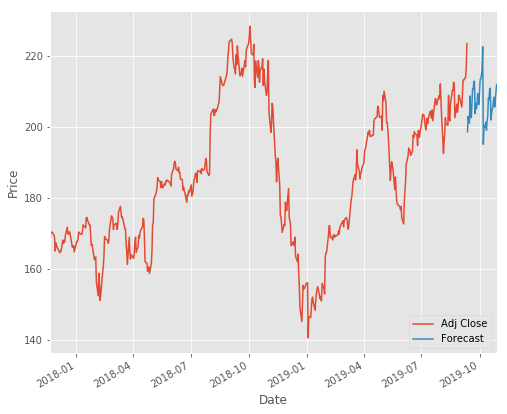

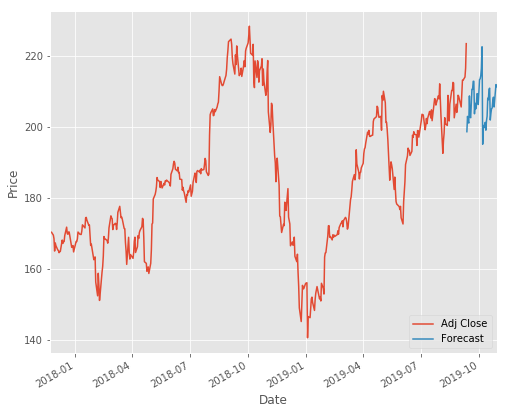

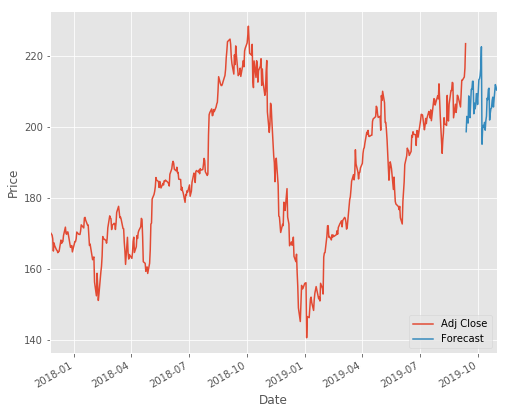

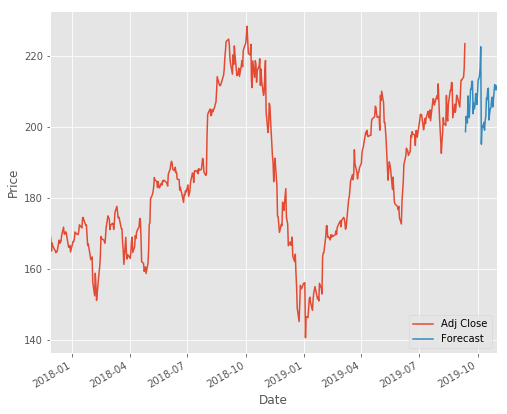

In [0]:
for i in forecast_set_poly2: #CORRECTION: NAME UPDATED AND CODE DUPLICATED FOR NEW ALGORITHM
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]

    dfreg['Adj Close'].tail(500).plot()
    dfreg['Forecast'].tail(500).plot()
    plt.legend(loc=4)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()

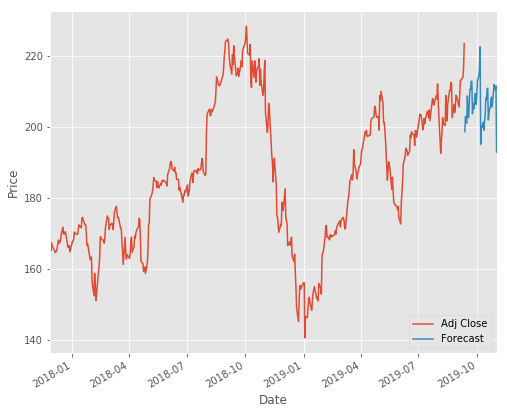

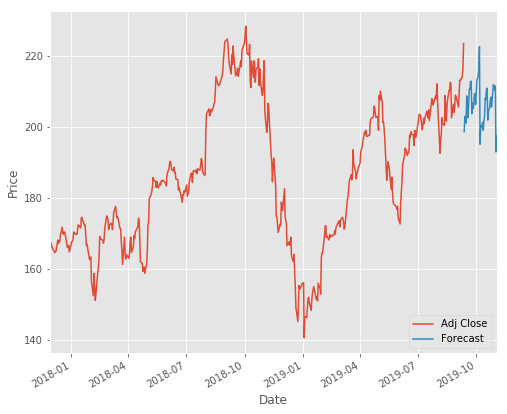

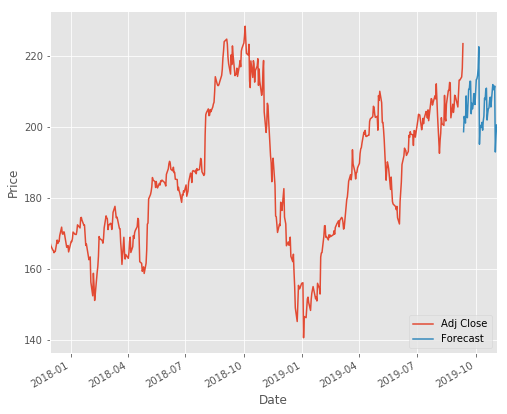

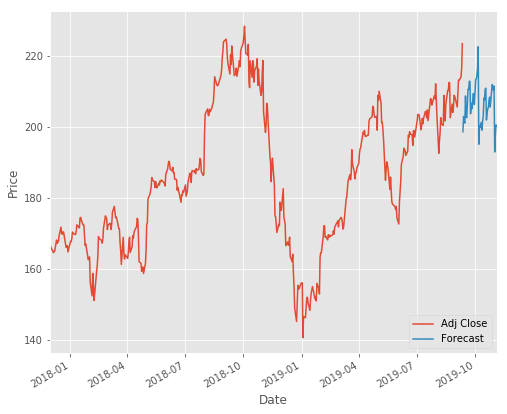

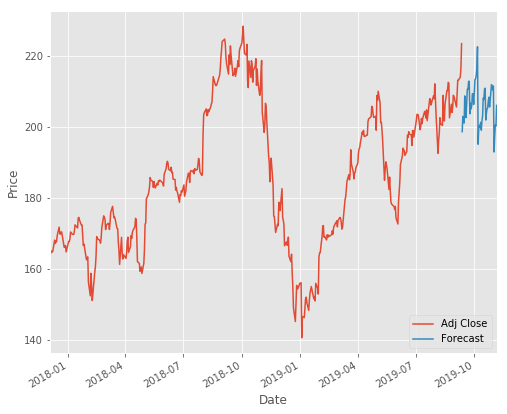

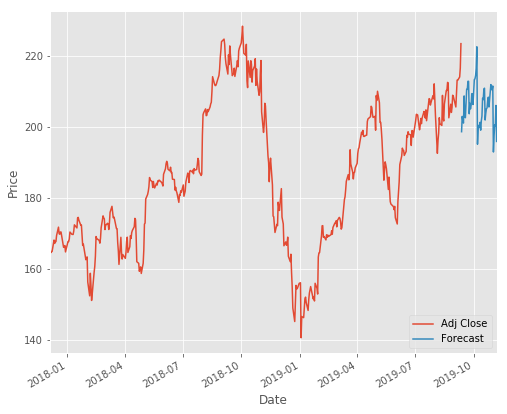

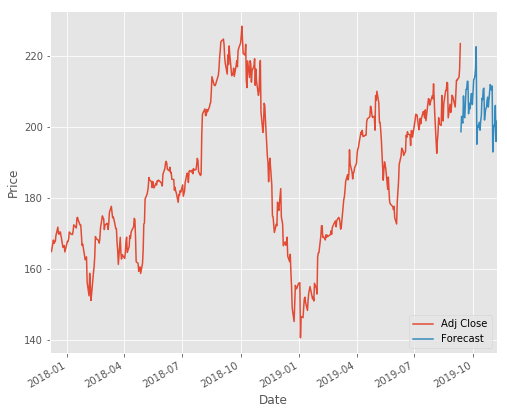

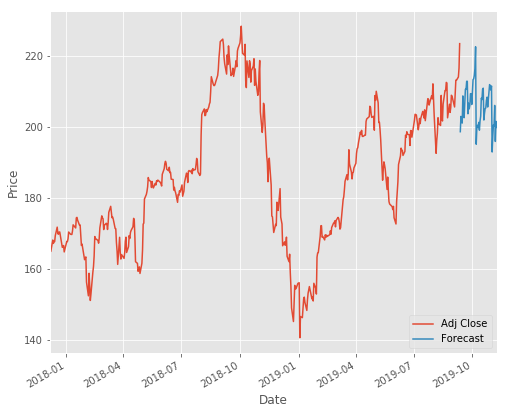

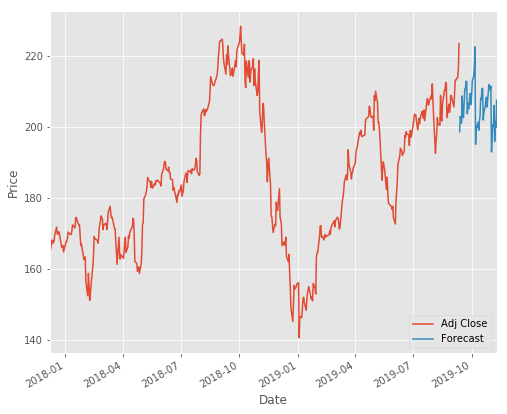

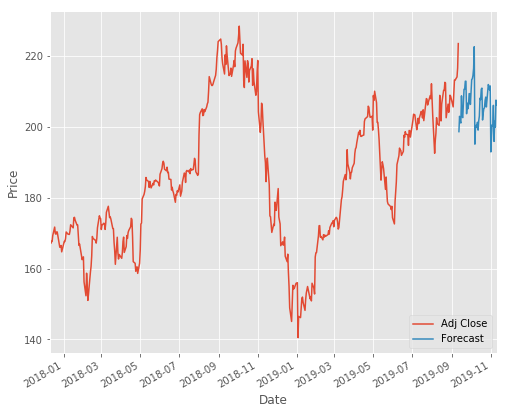

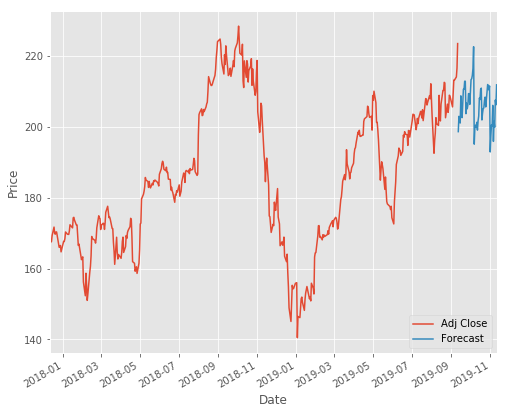

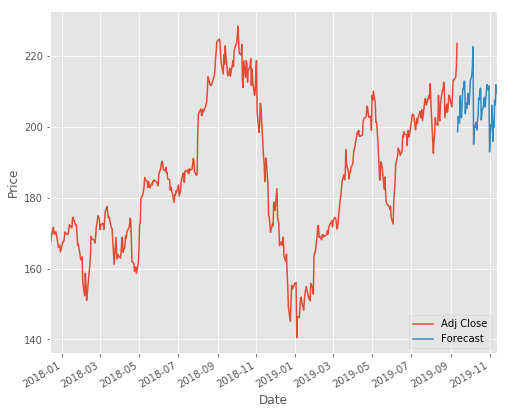

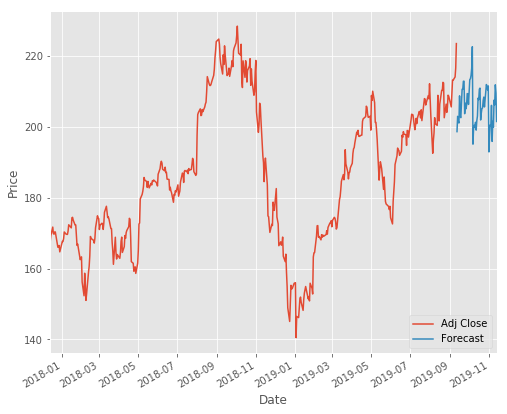

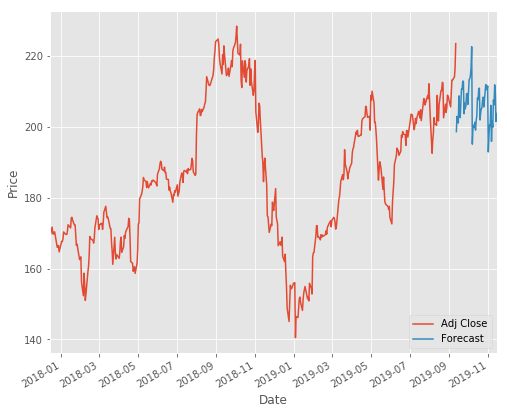

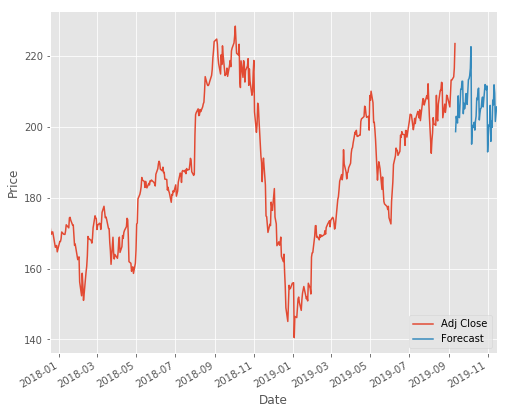

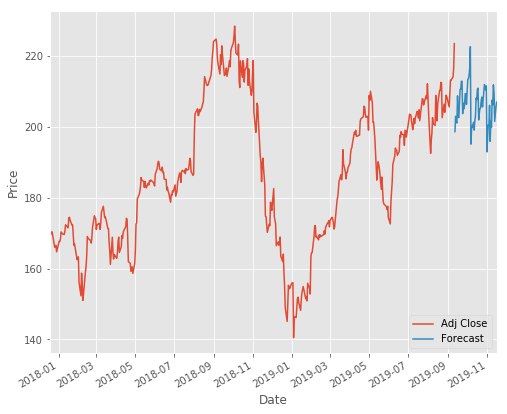

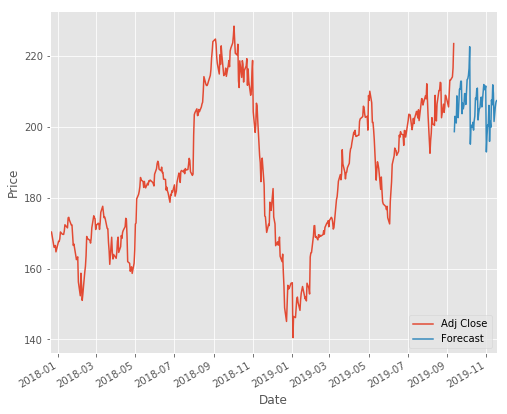

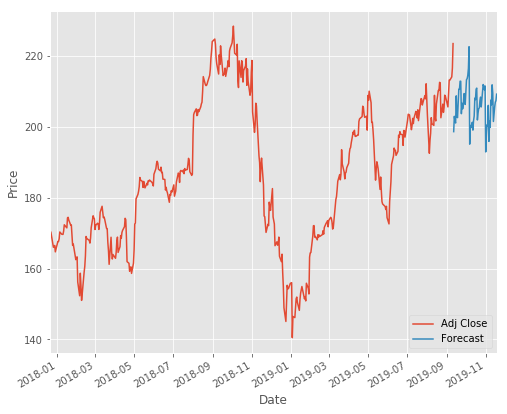

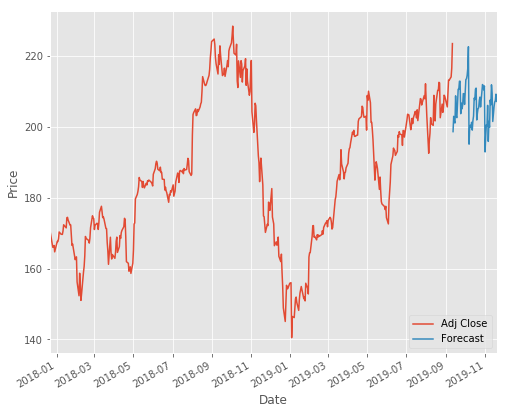

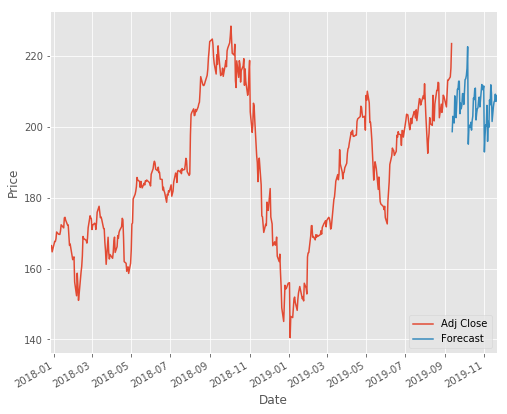

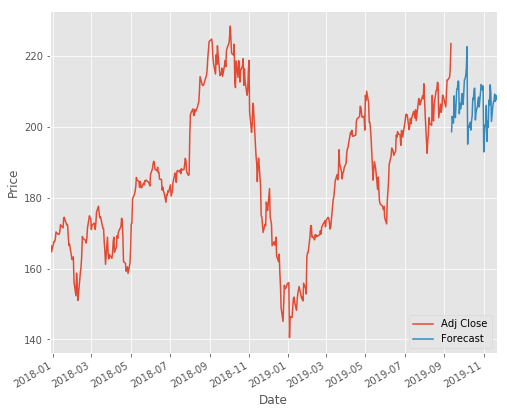

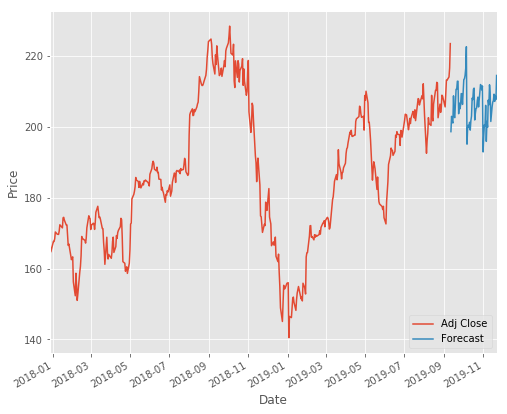

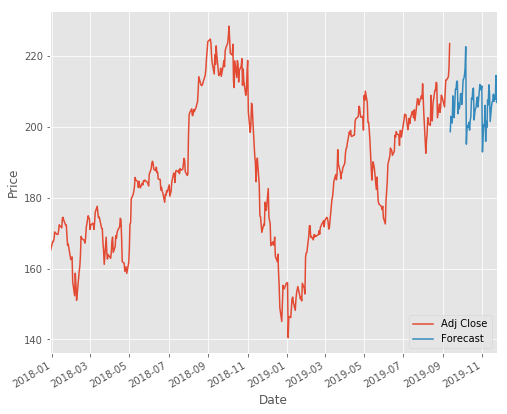

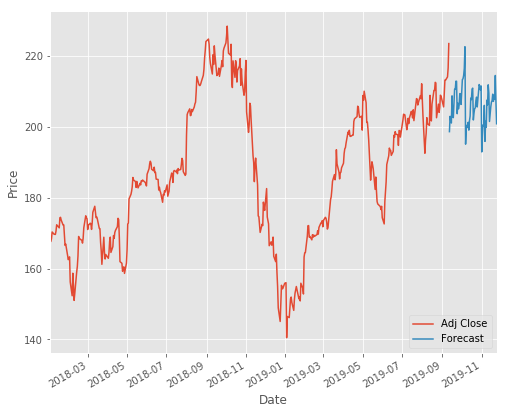

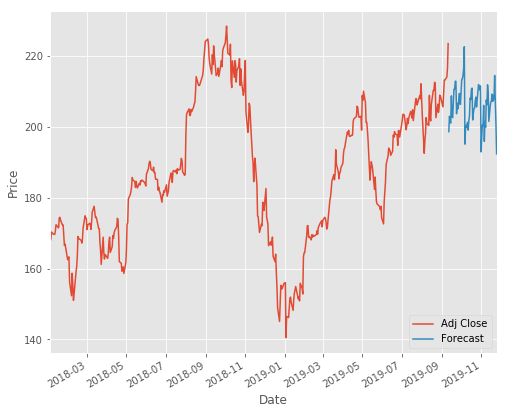

In [0]:
for i in forecast_set_poly3: #CORRECTION: NAME UPDATED AND CODE DUPLICATED FOR NEW ALGORITHM
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]

    dfreg['Adj Close'].tail(500).plot()
    dfreg['Forecast'].tail(500).plot()
    plt.legend(loc=4)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()

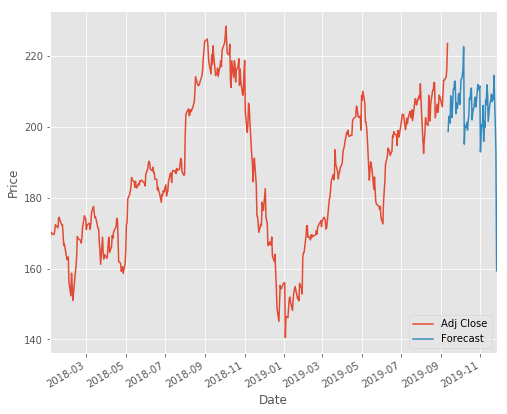

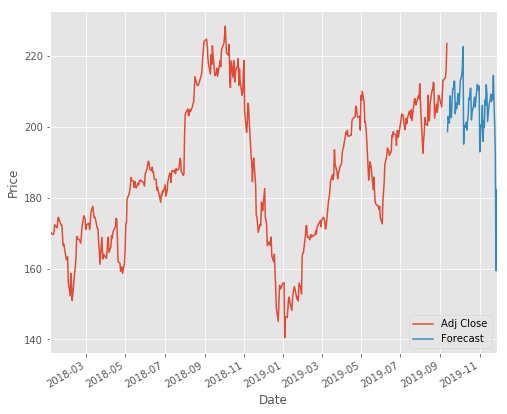

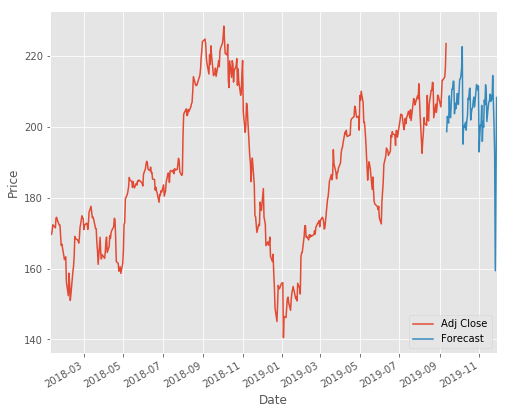

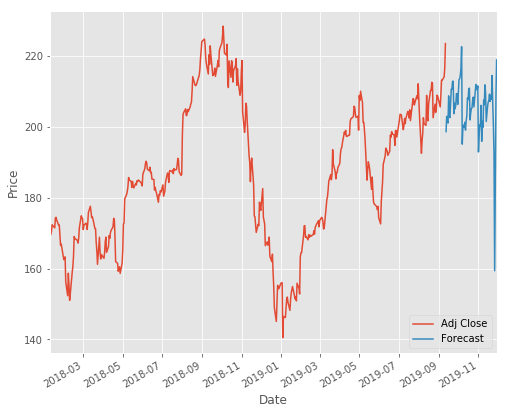

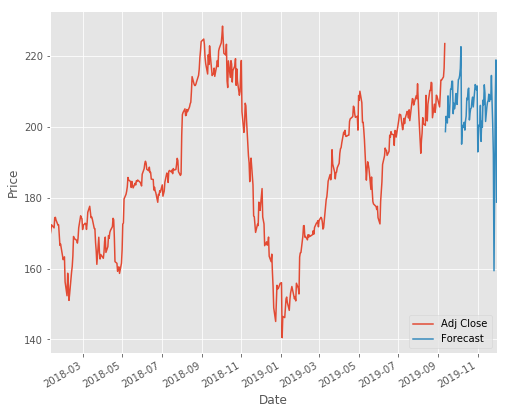

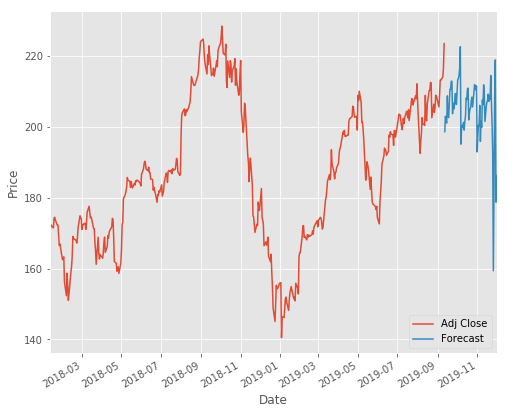

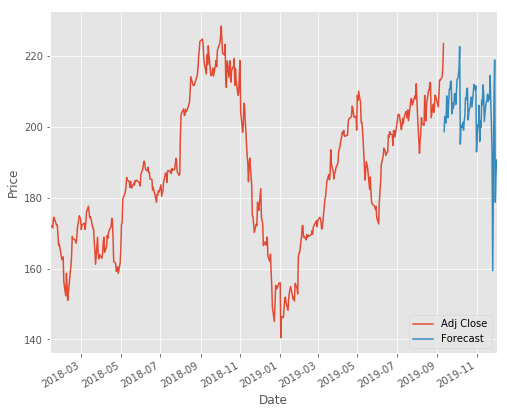

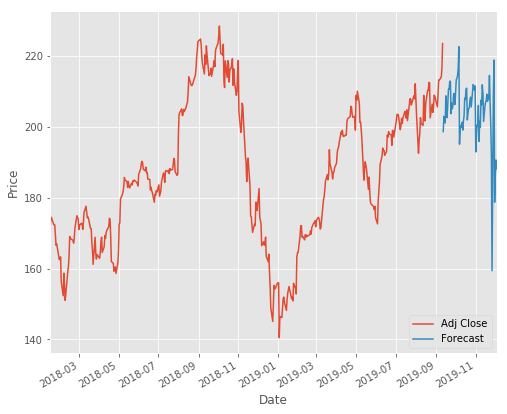

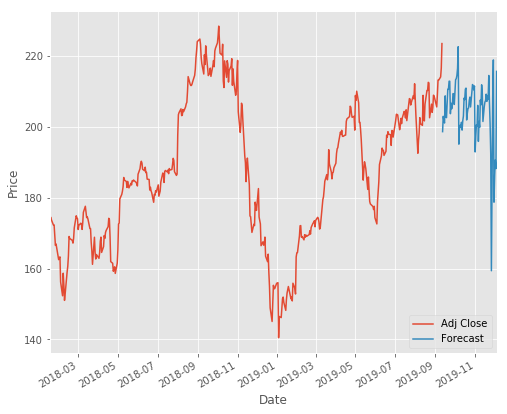

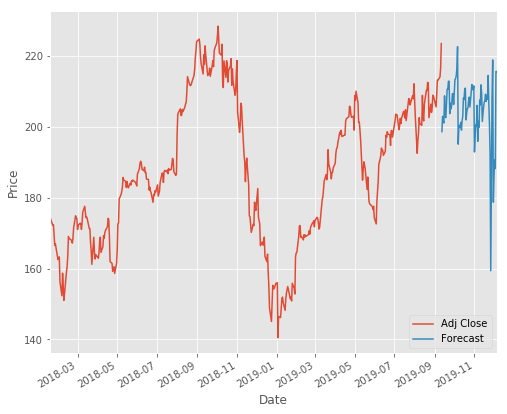

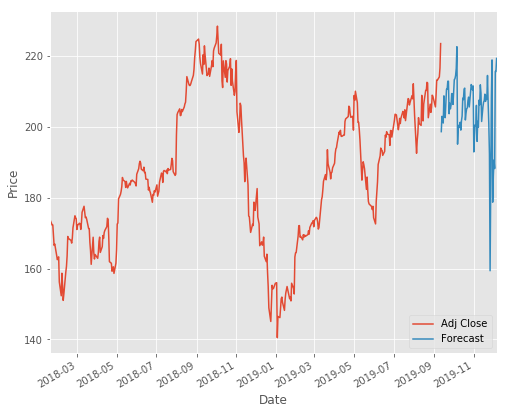

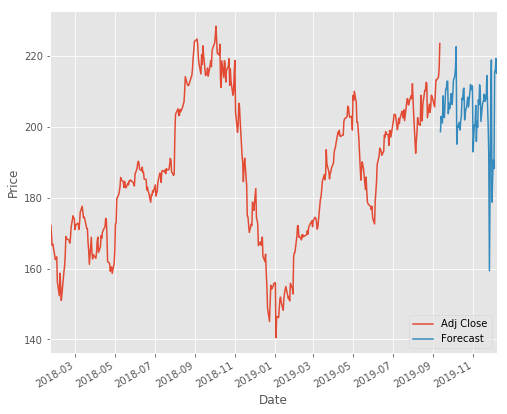

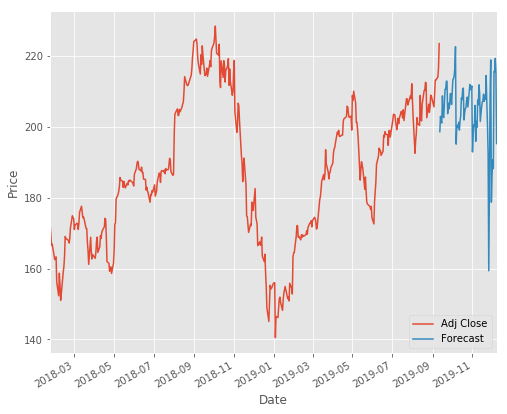

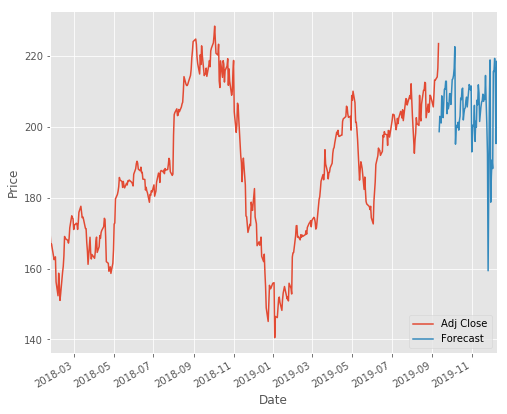

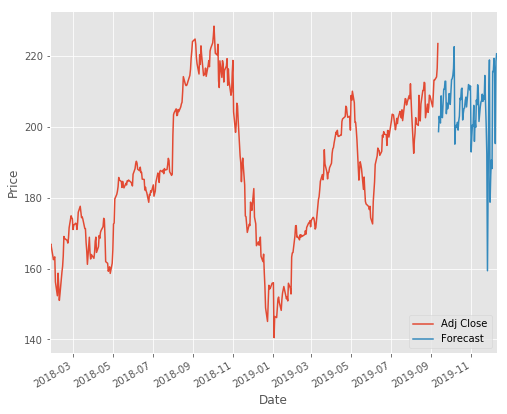

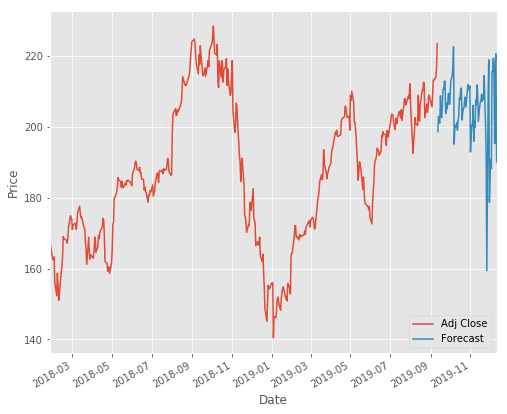

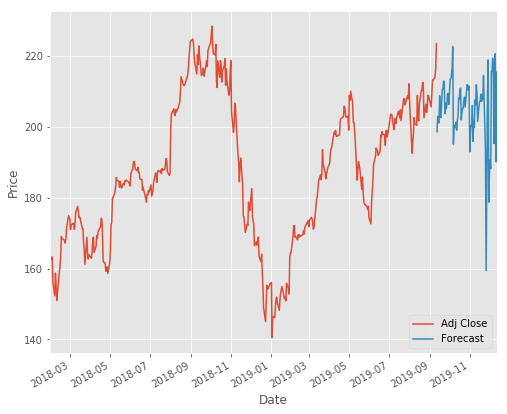

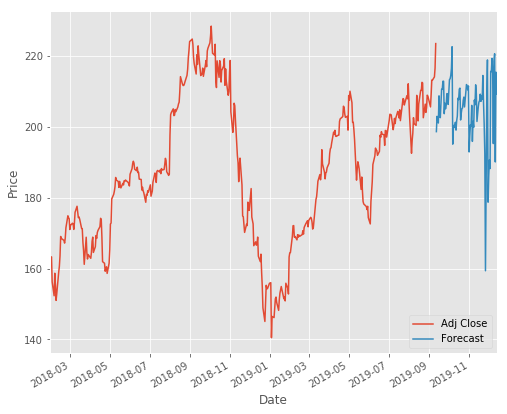

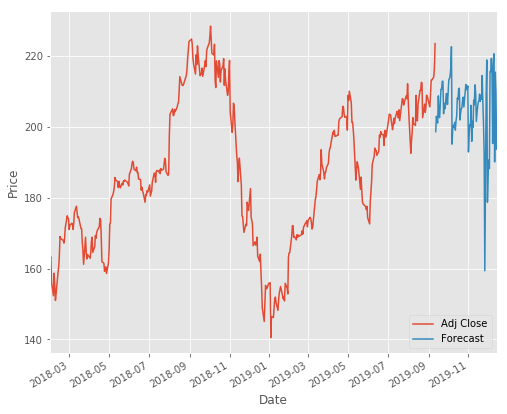

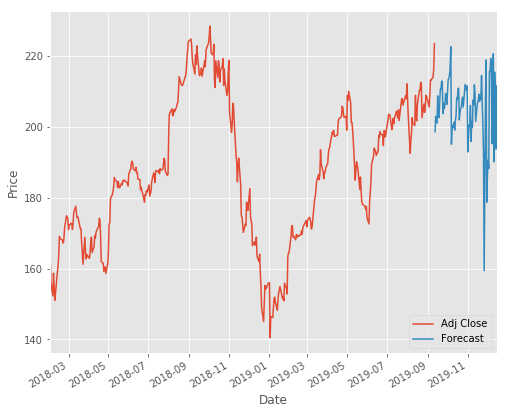

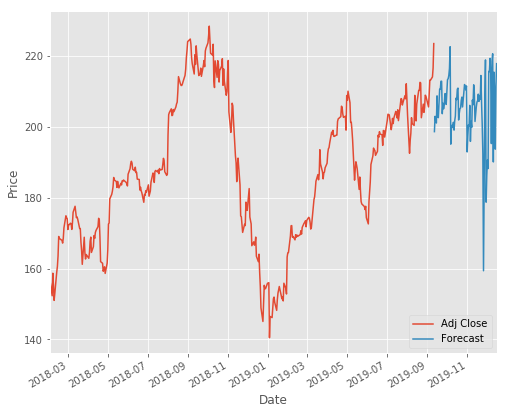

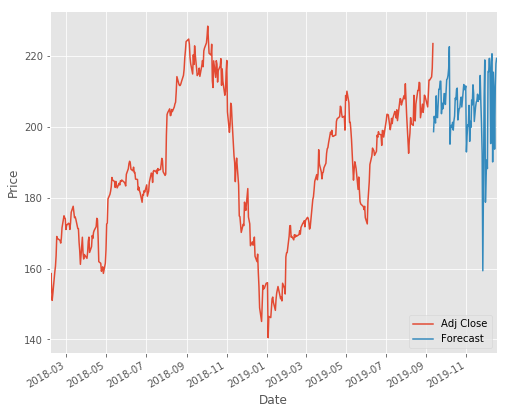

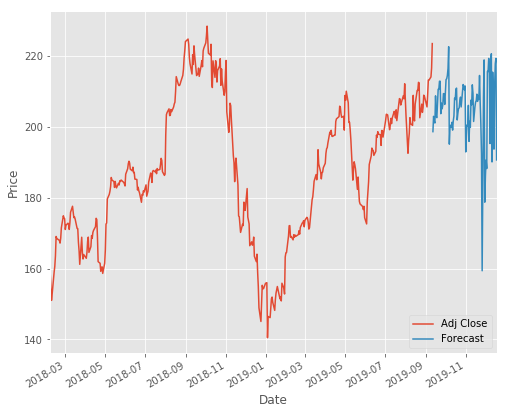

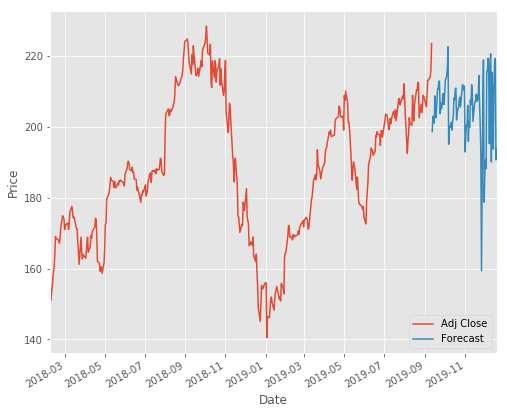

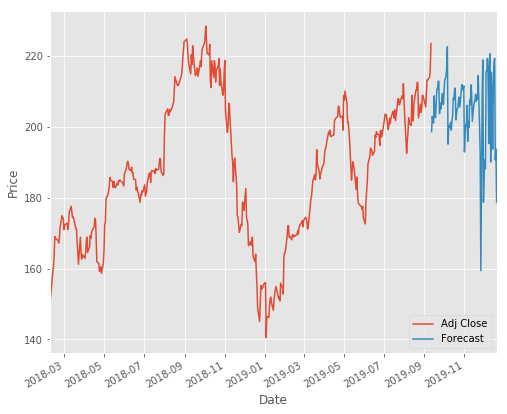

In [0]:
for i in forecast_set_knn: #CORRECTION: NAME UPDATED AND CODE DUPLICATED FOR NEW ALGORITHM
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]

    dfreg['Adj Close'].tail(500).plot()
    dfreg['Forecast'].tail(500).plot()
    plt.legend(loc=4)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()